<font size=13> CNN Classifier multiple classes 

In [3]:
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt

<font size=5> Load Data

In [4]:
#multi class labels:
    #0 = healthy
    #1 = acl tear ONLY
    #2 = meniscus tear ONLY
    #3 = abnormal ONLY
    #4 = acl & meniscus 
    #5 = meniscus & abnormal
    #6 = acl & abnormal
    #7 = acl & meniscus & abnormal
    

class_names = ['healthy', 'ACL only', 'Meniscus Only', 'Abnormal Only', 'ACL & Meniscus',
               'Meniscus & Abnormal', 'ACL & Abnormal', 'ACL & Meniscus & Abnormal']

#training images
folder_path_images = 'testing-minimized-axial_grid_images1'  # Update this with the path to your folder containing .npy files
images = sorted(os.listdir(folder_path_images))
nImages = len(images)
print("Num Images:",nImages)


#training labels        
labels = np.loadtxt("MRNet-v1.0/train-MRI-labels_combined.csv",
                 delimiter=",", dtype=int)

labels = list(labels)
#ensure the number of labels matches the number of imag
train_labelsCropped = labels[:nImages]
print("Num labels:", len(train_labelsCropped))


Num Images: 55
Num labels: 55


<font size=5> Create tensorflow dataset

Found 55 files belonging to 5 classes.
------BATCH SHAPE-----
Images (batch[0]) shape: (32, 512, 512, 3)
Labels (batch[1]): [3 7 3 5 3 5 3 3 3 3 5 0 0 3 0 3 5 0 7 5 5 0 5 0 3 0 0 5 5 3 5 3]


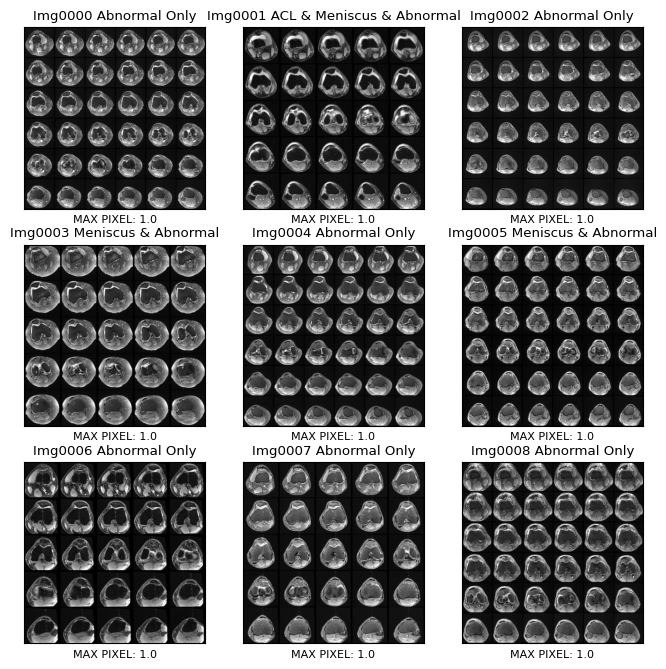

In [12]:

#create tensorflow dataset, specifying labels
data = tf.keras.utils.image_dataset_from_directory(folder_path_images, shuffle=False, labels=train_labelsCropped, image_size=(512,512), label_mode="int")

#scale data to 0-1 instead of 0-255
data = data.map(lambda imgs, labels: (imgs/255, labels)) #x will be images, y will be labels

data_iterator = data.as_numpy_iterator() #create an iterator to access data

batch = data_iterator.next() #grabs a batch of data

print("------BATCH SHAPE-----")
print("Images (batch[0]) shape:",batch[0].shape) #batch[0] has images, batch[1] has labels
print("Labels (batch[1]):",batch[1])


#take a look at some images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # print(train_labelsCropped[i])
    plt.imshow(batch[0][i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel("MAX PIXEL: " + str(batch[0][i].max()))
    plt.title("Img"+ str(i).zfill(4) +" "+ class_names[train_labelsCropped[i]])

plt.show()
plt.rcParams.update({'font.size': 8})


<font size=5> Build model

In [ ]:
from tensorflow.keras.models import Sequential #functional API exists aswell for fancier stuff
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

#adding layers
model.add(Conv2D(16, (3,3), 1, padding = 'same', activation='relu', input_shape=(512,512,3))) 
#16 filters, region of interest is 3x3 pixels, and stride of 1 pixel, shifts by 1 pixel for each ROI
#can increase num filters 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu')) #fully connected layers (256 neurons)
model.add(Dense(1, activation='sigmoid')) #finally the output is a single numnber, 0 = happy person, 1 = sad person